<a href="https://colab.research.google.com/github/aupe/dl_natural_scenes/blob/master/dl_cv_natural_scenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Natural Scenes around the world

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%load_ext autoreload
%autoreload 2

In [0]:
!pip install tensorflow-gpu==2.0.0-beta1

In [0]:
!pip install --upgrade --quiet apai

In [5]:
from apai.imports import *

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [7]:
__import__('apai').__version__

'0.0.1'

In [9]:
tf.__version__

'2.0.0-beta1'

In [0]:
DATA_DIR = Path('data/natural-scenes')
TEMP_DIR = Path('./gdrive/My Drive/Projetcs/07_Natural_Scenes_around_the world/temp/natural-scenes')
# TEMP_DIR = Path('temp/natural-scenes')



In [0]:
DATA_DIR.mkdir(parents=True, exist_ok=True)


In [0]:
TEMP_DIR.mkdir(parents=True, exist_ok=True)

In [0]:
# Kaggle data import
def setup_kaggle():
    !rm -rf /root/.kaggle
    x = !ls kaggle.json
    assert x == ['kaggle.json'], 'Upload kaggle.json'
    !mkdir /root/.kaggle
    !mv kaggle.json /root/.kaggle
    !chmod 600 /root/.kaggle/kaggle.json
    
setup_kaggle()

In [0]:
DOWNLOAD_DATA = True

if DOWNLOAD_DATA:
    !kaggle datasets download -q -d puneet6060/intel-image-classification --unzip -p {str(DATA_DIR)}

In [0]:
for name in ('seg_pred.zip', 'seg_test.zip', 'seg_train.zip',):
    shutil.unpack_archive(str(DATA_DIR/name), extract_dir=str(DATA_DIR/name[:-4]))

In [0]:
def make_df_from_dir_with_dim(path):
    data1 = {
        'category': [],
        'image': [],
        'path':[],
        'shape': [], 
    }
    for category in os.listdir(DATA_DIR/path):
        for item in os.listdir(DATA_DIR/path/category):
            data1['category'].append(category)
            data1['image'].append(f"{category}/{item}")
            data1['path'].append(DATA_DIR/path/category/item)            
            data1['shape'].append(np.array(Image.open(DATA_DIR/path/category/item)).shape)
                      
    return pd.DataFrame(data1)

In [0]:
train_df_full = make_df_from_dir_with_dim('seg_train/seg_train')

In [0]:
train_df_full.to_csv(TEMP_DIR/'train_df_full.csv', index=False)

In [0]:
train_df_full = pd.read_csv(TEMP_DIR/'train_df_full.csv')

In [8]:
train_df_full.head(2)

category  ...          shape
0      sea  ...  (150, 150, 3)
1      sea  ...  (150, 150, 3)

[2 rows x 4 columns]

In [9]:
train_df_full['category'].unique()

array(['sea', 'mountain', 'street', 'glacier', 'buildings', 'forest'],
      dtype=object)

In [10]:
train_df_full['image'].nunique()

14034

In [0]:
test_df = make_df_from_dir_with_dim('seg_test/seg_test')

In [18]:
test_df.head(2)

category  ...          shape
0      sea  ...  (150, 150, 3)
1      sea  ...  (150, 150, 3)

[2 rows x 4 columns]

In [129]:
test_df['category'].unique()

array(['sea', 'mountain', 'street', 'glacier', 'buildings', 'forest'],
      dtype=object)

In [131]:
test_df['image'].nunique()

3000

In [0]:
def plot_df_images(df, path_col, label_col, n_rows, n_columns):
    f,ax = plt.subplots(n_rows,n_columns, figsize=(5 * n_columns, 5 * n_rows))
    for i in range(n_rows*n_columns):
        rand_int = np.random.randint(len(df.index))
        ax[i // n_columns, i % n_columns].imshow(Image.open(df[path_col][rand_int]))
        ax[i // n_columns, i % n_columns].set_title(df[label_col][rand_int])
        ax[i // n_columns, i % n_columns].axis('off')

### Examples of train images

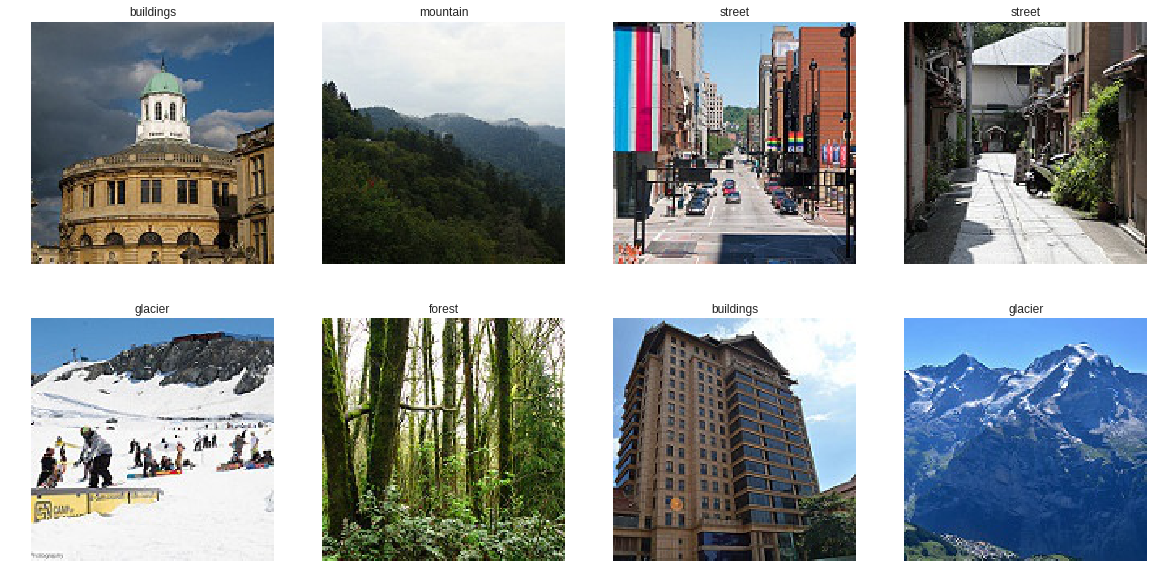

In [83]:
plot_df_images(train_df_full, 'path', 'category', 2, 4)

### Examples of test images

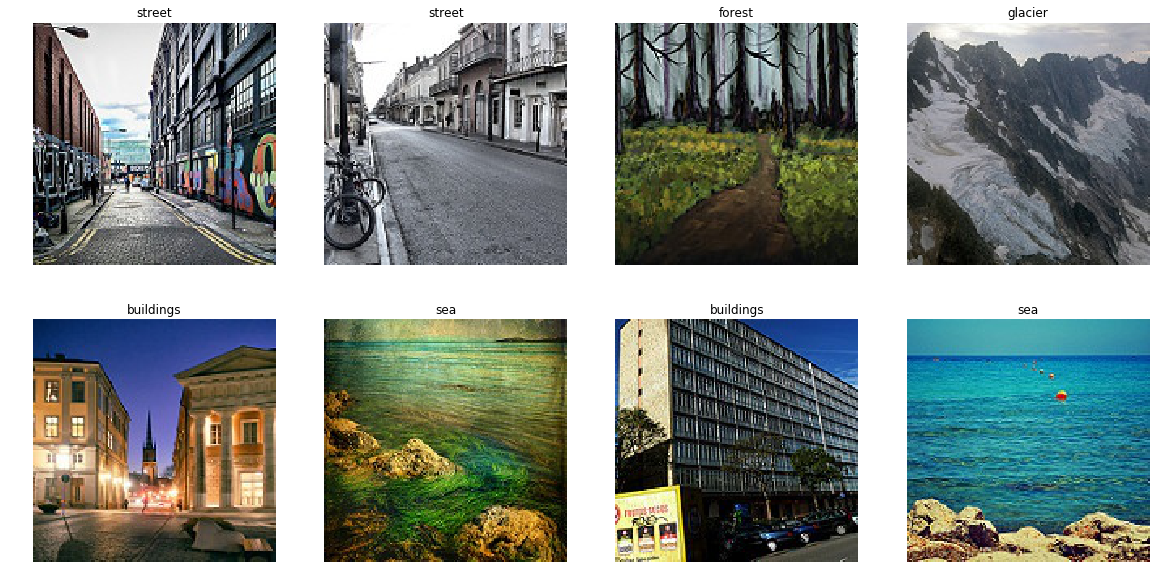

In [19]:
plot_df_images(test_df, 'path', 'category', 2, 4)

### Image shape distribution

In [20]:
train_df_full.groupby('shape')['image'].nunique()

shape
(100, 150, 3)        1
(102, 150, 3)        1
(103, 150, 3)        1
(105, 150, 3)        1
(108, 150, 3)        2
(110, 150, 3)        1
(111, 150, 3)        3
(113, 150, 3)        7
(115, 150, 3)        1
(119, 150, 3)        1
(120, 150, 3)        1
(123, 150, 3)        2
(124, 150, 3)        1
(131, 150, 3)        1
(133, 150, 3)        1
(134, 150, 3)        2
(135, 150, 3)        3
(136, 150, 3)        2
(140, 150, 3)        1
(141, 150, 3)        1
(142, 150, 3)        2
(143, 150, 3)        2
(144, 150, 3)        2
(145, 150, 3)        1
(146, 150, 3)        2
(147, 150, 3)        1
(149, 150, 3)        1
(150, 150, 3)    13986
(76, 150, 3)         1
(81, 150, 3)         1
(97, 150, 3)         1
Name: image, dtype: int64

In [21]:
test_df.groupby('shape')['image'].nunique()

shape
(72, 150, 3)        1
(76, 150, 3)        1
(81, 150, 3)        1
(110, 150, 3)       1
(131, 150, 3)       1
(141, 150, 3)       1
(149, 150, 3)       1
(150, 150, 3)    2993
Name: image, dtype: int64

### Image labels distribution

Text(0.5, 1.0, 'Number of Test images')

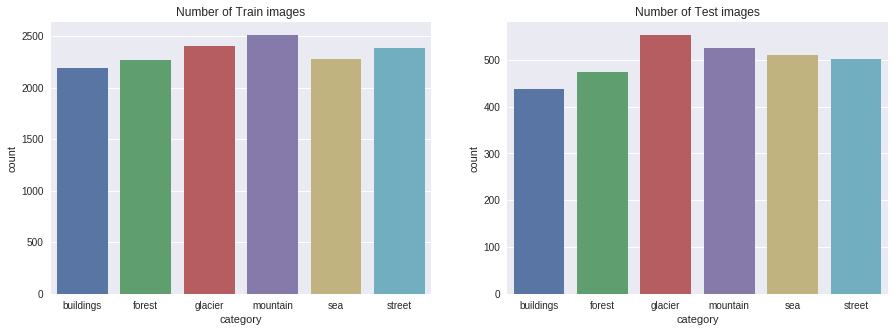

In [84]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.style.use('seaborn')
sns.countplot(train_df_full['category'].sort_values(),data=train_df_full, ax=ax[0])
sns.countplot(test_df['category'].sort_values(),data=test_df, ax=ax[1])
ax[0].set_title('Number of Train images')
ax[1].set_title('Number of Test images')

## Image preprocessing

In [0]:
train_df, val_df = train_test_split(train_df_full, random_state=42)

In [152]:
val_df.head(3)

category  ...          shape
0      sea  ...  (150, 150, 3)
1   forest  ...  (150, 150, 3)
2   forest  ...  (150, 150, 3)

[3 rows x 4 columns]

In [0]:
train_df.reset_index(drop=True, inplace=True)
val_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [0]:
train_df.to_csv(TEMP_DIR/'train_df.csv', index=False)

In [0]:
val_df.to_csv(TEMP_DIR/'val_df.csv', index=False)

In [0]:
test_df.to_csv(TEMP_DIR/'test_df.csv', index=False)

In [0]:
train_df = pd.read_csv(TEMP_DIR/'train_df.csv')

In [0]:
val_df = pd.read_csv(TEMP_DIR/'val_df.csv')

In [0]:
test_df = pd.read_csv(TEMP_DIR/'test_df.csv')

In [157]:
train_df.head(3)

category  ...          shape
0  glacier  ...  (150, 150, 3)
1  glacier  ...  (150, 150, 3)
2   street  ...  (150, 150, 3)

[3 rows x 4 columns]

In [154]:
val_df.head(3)

category  ...          shape
0      sea  ...  (150, 150, 3)
1   forest  ...  (150, 150, 3)
2   forest  ...  (150, 150, 3)

[3 rows x 4 columns]

In [160]:
test_df.head(3)

category  ...          shape
0      sea  ...  (150, 150, 3)
1      sea  ...  (150, 150, 3)
2      sea  ...  (150, 150, 3)

[3 rows x 4 columns]

In [161]:
[x.shape for x in (train_df, test_df, val_df)]

[(10525, 4), (3000, 4), (3509, 4)]

In [0]:
target_col = 'category'
image_path_col = 'image'

In [0]:
IMG_DIMS = (99, 99)

In [0]:
label_pipeline = LabelEncoder()

In [28]:
label_pipeline.fit_transform(train_df[target_col])

array([2, 2, 5, ..., 5, 4, 2])

In [0]:
with open(TEMP_DIR/"label_pipeline.pickle", "wb") as f:
    pickle.dump(label_pipeline, f)

In [0]:
with open(TEMP_DIR/"label_pipeline.pickle", "rb") as f:
    label_pipeline = pickle.load(f)

In [0]:
n_classes = train_df[target_col].nunique()

In [32]:
n_classes

6

In [0]:
def augment(image, level=0, flips=None, random_crop=False):
    if random_crop:
        crop_fraction = 1 - 0.05 * level
        scaled_dim = tf.to_int32(
            crop_fraction * tf.to_float(tf.reduce_min(tf.shape(image)[:2]))
        )
        image = tf.image.random_crop(image, (scaled_dim, scaled_dim, 3))
        image = tf.image.resize(image, IMG_DIMS)

    if flips in ["horizontal", "both"]:
        image = tf.image.random_flip_left_right(image)
    if flips in ["vertical", "both"]:
        image = tf.image.random_flip_up_down(image)

    if level > 0:
        lower = 1 - 0.1 * level
        upper = 1 + 0.1 * level
        image = tf.image.random_contrast(image, lower=lower, upper=upper)
        image = tf.image.random_saturation(image, lower=lower, upper=upper)
        image = tf.clip_by_value(image, 0.0, 1.0)
    return image

In [0]:
def image_parse(filename, preprocess_fn, img_dims, mode):
    image_string = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image_string, channels=3)
    image = preprocess_fn(image)
    if mode == "stretch":
        image = tf.image.resize(image, img_dims)
    elif mode == "crop":
        image = tf.image.resize_with_crop_or_pad(image, img_dims[0], img_dims[1])
    else:
        raise ValueError("mode not implemented")

    return image

In [0]:
def prepare_ds(
    x,
    y,
    batch_size,
    parse_fn,
    augment_fn,
    mode,
    shuffle=False,
    prefetch=1,
    num_parallel_calls=1,
):
    dataset_length = len(x)
    preprocess_fn = partial(tf.image.convert_image_dtype, dtype=tf.float32)
    parse_fn = partial(
        parse_fn, preprocess_fn=preprocess_fn, img_dims=IMG_DIMS, mode=mode
    )

    image_ds = (
        tf.data.Dataset.from_tensor_slices(x)
        .map(parse_fn, num_parallel_calls=num_parallel_calls)
        .map(augment_fn, num_parallel_calls=num_parallel_calls)
    )
    label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(y, tf.float32))
    ds = tf.data.Dataset.zip((image_ds, label_ds))

    if shuffle:
        ds = ds.shuffle(dataset_length)

    ds = ds.batch(batch_size)
    ds = ds.repeat()
    
    if prefetch:
        ds = ds.prefetch(prefetch)
    
    return ds, dataset_length, batch_size

In [0]:
train_dataset, train_dataset_length, train_batch_size = prepare_ds(
    x=np.array([str(DATA_DIR/"seg_train/seg_train"/f"{getattr(row, image_path_col)}") for row in train_df.itertuples()]),
    y=label_pipeline.transform(train_df[target_col]),
    batch_size=2,
    parse_fn=image_parse,
    augment_fn=partial(augment, level=2),
    mode="crop",
    shuffle=True,
    prefetch=0,
    num_parallel_calls=-1,
)

In [0]:
val_dataset, val_dataset_length, val_batch_size = prepare_ds(
    x=np.array([str(DATA_DIR/"seg_train/seg_train"/f"{getattr(row, image_path_col)}") for row in val_df.itertuples()]),
    y=label_pipeline.transform(val_df[target_col]),
    batch_size=2,
    parse_fn=image_parse,
    augment_fn=augment,
    mode="crop",
    shuffle=False,
    prefetch=0,
    num_parallel_calls=-1,
)

In [0]:
test_dataset, test_dataset_length, test_batch_size = prepare_ds(
    x=np.array([str(DATA_DIR/"seg_test/seg_test"/f"{getattr(row, image_path_col)}") for row in test_df.itertuples()]),
    y=label_pipeline.transform(test_df[target_col]),
    batch_size=2,
    parse_fn=image_parse,
    augment_fn=augment,
    mode="crop",
    shuffle=False,
    prefetch=0,
    num_parallel_calls=-1,
)

In [0]:
def plot_dataset(dataset, rows, cols):
    _, ax = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
    for i, (x, y) in enumerate(dataset.take(rows * cols)):
        ax[i // cols, i % cols].axis('off')
        ax[i // cols, i % cols].imshow(x[0])
        ax[i // cols, i % cols].set_title(y[0].numpy())

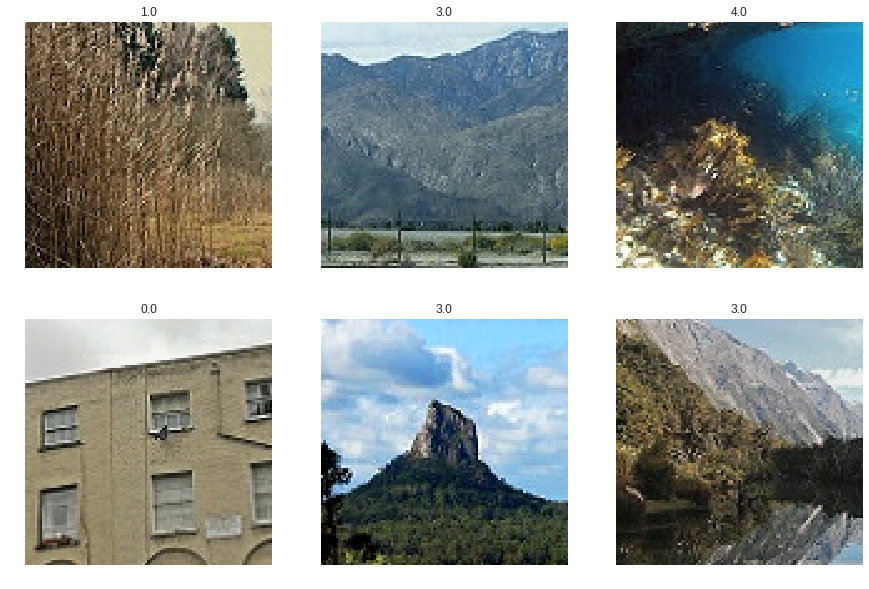

In [153]:
plot_dataset(train_dataset, 2, 3)

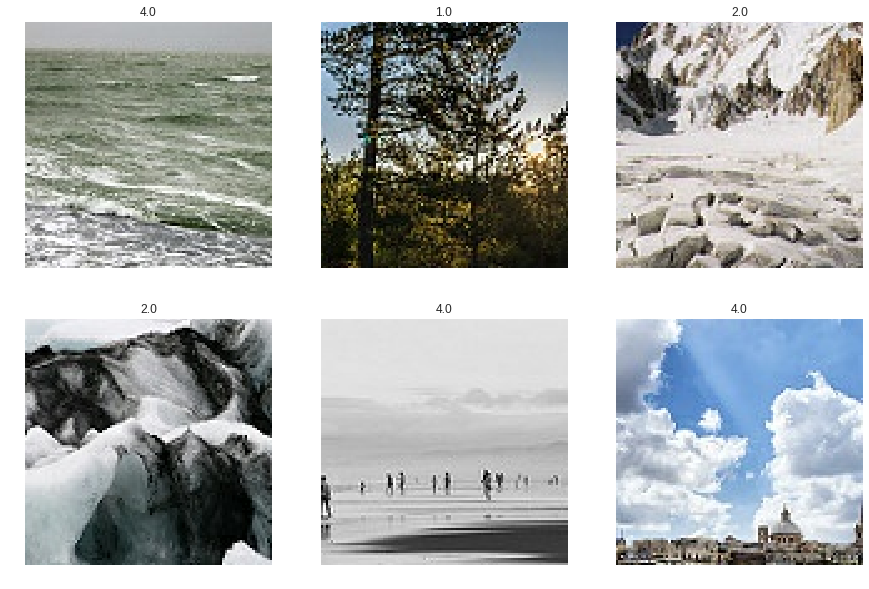

In [179]:
plot_dataset(val_dataset, 2, 3)

##  Basic Model 

In [0]:
input_shape = IMG_DIMS + (3,)

In [0]:
def make_model(
    n_classes,
    input_shape,
    dropout_rate=0.0,
    l1=1e-8,
    l2=1e-8,
):
    base_model = keras.applications.Xception(include_top=False, input_shape=input_shape)
    x = keras.layers.concatenate([
        keras.layers.GlobalAvgPool2D()(base_model.output),
        keras.layers.GlobalMaxPool2D()(base_model.output),
    ])
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Dropout(dropout_rate)(x)
    x = keras.layers.Dense(
        n_classes,
        kernel_regularizer=keras.regularizers.l1_l2(l1, l2),
        activation=keras.activations.softmax,
    )(x)
    return keras.Model(inputs=base_model.inputs, outputs=x)

In [0]:
def train_model(model, optimizer, lr, epochs, easing_epochs):
    if easing_epochs:
        for layer in model.layers[:-1]:
            layer.trainable = False

        model.compile(
            optimizer=optimizer(lr),
            loss=keras.losses.sparse_categorical_crossentropy,
            metrics=[
                keras.metrics.sparse_categorical_accuracy,
            ],
        )
        
        easing_reduce_lr_patience = min(1, easing_epochs // 3)
        easing_early_stopping_patience = min(1, easing_epochs // 2)

        model.fit(
            x=train_dataset,
            steps_per_epoch=math.ceil(train_dataset_length/train_batch_size),
            validation_data=val_dataset,
            validation_steps=math.ceil(val_dataset_length/val_batch_size),
            epochs=easing_epochs,
            callbacks=[
                keras.callbacks.ReduceLROnPlateau(factor=0.3, patience=easing_reduce_lr_patience),
                keras.callbacks.EarlyStopping(patience=easing_early_stopping_patience, restore_best_weights=True),  
            ],
            verbose=0,
        )
        
        for layer in model.layers:
            layer.trainable = True
        
    model.compile(
        optimizer=optimizer(lr),
        loss=keras.losses.sparse_categorical_crossentropy,
        metrics=[
            keras.metrics.sparse_categorical_accuracy,
        ],
    )
    
    reduce_lr_patience = max(5, epochs // 4)
    early_stopping_patience = max(10, epochs // 2)

    history = model.fit(
        x=train_dataset,
        steps_per_epoch=math.ceil(train_dataset_length/train_batch_size),
        validation_data=val_dataset,
        validation_steps=math.ceil(val_dataset_length/val_batch_size),
        epochs=epochs,
        callbacks=[
            keras.callbacks.ReduceLROnPlateau(factor=0.3, patience=reduce_lr_patience),
            keras.callbacks.EarlyStopping(patience=early_stopping_patience, restore_best_weights=True),
        ],
        verbose=1,
    )
    
    return history

In [0]:
model = make_model(
    n_classes=n_classes,
    input_shape=input_shape,
    dropout_rate=0.2,
    l1=3e-6,
    l2=3e-5,
)

In [0]:
train_model(
    model=model,
    optimizer=keras.optimizers.Adam,
    lr=1e-4,
    epochs=7,
    easing_epochs=3,
)

Epoch 1/7
5263/5263 [==============================] - 529s 101ms/step - loss: 0.7213 - sparse_categorical_accuracy: 0.7782 - val_loss: 3.9683 - val_sparse_categorical_accuracy: 0.6312
Epoch 2/7
5263/5263 [==============================] - 462s 88ms/step - loss: 0.7125 - sparse_categorical_accuracy: 0.7831 - val_loss: 3.4003 - val_sparse_categorical_accuracy: 0.7096
Epoch 3/7
5263/5263 [==============================] - 473s 90ms/step - loss: 0.6582 - sparse_categorical_accuracy: 0.8038 - val_loss: 2.4143 - val_sparse_categorical_accuracy: 0.7392
Epoch 4/7
5263/5263 [==============================] - 460s 87ms/step - loss: 0.6040 - sparse_categorical_accuracy: 0.8179 - val_loss: 2.1983 - val_sparse_categorical_accuracy: 0.7766
Epoch 5/7
5263/5263 [==============================] - 466s 89ms/step - loss: 0.5436 - sparse_categorical_accuracy: 0.8381 - val_loss: 2.4025 - val_sparse_categorical_accuracy: 0.6432
Epoch 6/7
5263/5263 [==============================] - 465s 88ms/step - loss: 0

## HP tuning

In [0]:
default_parameters = [keras.optimizers.Nadam, 3e-4, 0.4, 3e-6, 3e-5, 10, 3]

In [0]:
best_accuracy = 0.0

In [0]:
best_model_arch_path = str(TEMP_DIR/'best_model.json')
best_model_weights_path = str(TEMP_DIR/'best_model.h5')

In [0]:
def train_model_hp(model, optimizer, lr, epochs, easing_epochs):
    if easing_epochs:
        for layer in model.layers[:-1]:
            layer.trainable = False

        model.compile(
            optimizer=optimizer(lr),
            loss=keras.losses.sparse_categorical_crossentropy,
            metrics=[
                keras.metrics.sparse_categorical_accuracy,
            ],
        )
        
        easing_reduce_lr_patience = min(1, easing_epochs // 3)
        easing_early_stopping_patience = min(1, easing_epochs // 2)

        model.fit(
            x=train_dataset,
            steps_per_epoch=math.ceil(train_dataset_length/train_batch_size),
            validation_data=val_dataset,
            validation_steps=math.ceil(val_dataset_length/val_batch_size),
            epochs=easing_epochs,
            callbacks=[
                keras.callbacks.ReduceLROnPlateau(factor=0.3, patience=easing_reduce_lr_patience),
                keras.callbacks.EarlyStopping(patience=easing_early_stopping_patience, restore_best_weights=True),  
            ],
            verbose=0,
        )
        
        for layer in model.layers:
            layer.trainable = True
        
    model.compile(
        optimizer=optimizer(lr),
        loss=keras.losses.sparse_categorical_crossentropy,
        metrics=[
            keras.metrics.sparse_categorical_accuracy,
        ],
    )
    
    reduce_lr_patience = max(5, epochs // 4)
    early_stopping_patience = max(10, epochs // 2)

    history = model.fit(
        x=train_dataset,
        steps_per_epoch=math.ceil(train_dataset_length/train_batch_size),
        validation_data=val_dataset,
        validation_steps=math.ceil(val_dataset_length/val_batch_size),
        epochs=epochs,
        callbacks=[
            keras.callbacks.ReduceLROnPlateau(factor=0.3, patience=reduce_lr_patience),
            keras.callbacks.EarlyStopping(patience=early_stopping_patience, restore_best_weights=True),  
        ],
        verbose=1,
    )
    
    return history

In [0]:
@skopt.utils.use_named_args(dimensions=dimensions)
def fitness(
    optimizer,
    lr,
    dropout,
    l1_reg,
    l2_reg,
    epochs,
    easing_epochs,
):  
    model = make_model(
        n_classes,
        input_shape,
        dropout,
        l1_reg,
        l2_reg,
    )
    
    history = train_model_hp(model, optimizer, lr, epochs, easing_epochs)

    accuracy = max(history.history["val_sparse_categorical_accuracy"])

    print("\nAccuracy: {0:.2%}\n".format(accuracy))

    global best_accuracy

    if accuracy > best_accuracy:
        print('Best model'.center(80, '-'))
        print("Accuracy: {0:.4%}".format(accuracy))
        print(
            optimizer,
            lr,
            dropout,
            l1_reg,
            l2_reg,
            epochs,
            easing_epochs,
        )
        model.save_weights(best_model_weights_path)
        with open(best_model_arch_path, "w") as f:
            f.write(model.to_json())
        best_accuracy = accuracy

    del model

    keras.backend.clear_session()

    return -accuracy

In [0]:
search_result = skopt.gp_minimize(
    func=fitness,
    dimensions=dimensions,
    acq_func='EI',
    n_calls=11,
    x0=default_parameters,
)

Epoch 1/10
5263/5263 [==============================] - 623s 118ms/step - loss: 1.5275 - sparse_categorical_accuracy: 0.4907 - val_loss: 3.3740 - val_sparse_categorical_accuracy: 0.5304
Epoch 2/10
5263/5263 [==============================] - 550s 104ms/step - loss: 1.1551 - sparse_categorical_accuracy: 0.6092 - val_loss: 8.6794 - val_sparse_categorical_accuracy: 0.3152
Epoch 3/10
5263/5263 [==============================] - 542s 103ms/step - loss: 1.0925 - sparse_categorical_accuracy: 0.6316 - val_loss: 4.4528 - val_sparse_categorical_accuracy: 0.6124
Epoch 4/10
5263/5263 [==============================] - 550s 105ms/step - loss: 0.9645 - sparse_categorical_accuracy: 0.6897 - val_loss: 4.2081 - val_sparse_categorical_accuracy: 0.6332
Epoch 5/10
5263/5263 [==============================] - 556s 106ms/step - loss: 0.9167 - sparse_categorical_accuracy: 0.7092 - val_loss: 4.7451 - val_sparse_categorical_accuracy: 0.5563
Epoch 6/10
5263/5263 [==============================] - 553s 105ms/ste

In [0]:
def load_model(arch, weights):
    with open(arch, "r") as f:
        model = keras.models.model_from_json(f.read())
    model.load_weights(weights)
    return model

In [0]:
model = load_model(best_model_arch_path, best_model_weights_path)

In [0]:
model.compile(
    optimizer=keras.optimizers.SGD(1),
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=[
        keras.metrics.sparse_categorical_accuracy,
    ],
)

In [142]:
model.evaluate(val_dataset, steps=math.ceil(val_dataset_length/val_batch_size))

1755/1755 [==============================] - 56s 32ms/step - loss: 1.8176 - sparse_categorical_accuracy: 0.8572


[1.817592461987437, 0.8572243]

In [143]:
model.evaluate(test_dataset, steps=math.ceil(test_dataset_length/test_batch_size))

1500/1500 [==============================] - 46s 30ms/step - loss: 2.1473 - sparse_categorical_accuracy: 0.8260


[2.147251024784831, 0.826]

In [0]:
val_predictions = model.predict(
    val_dataset,
    steps=math.ceil(val_dataset_length/val_batch_size),
)

In [0]:
val_labels = np.concatenate([
    y.numpy() for _, y in val_dataset.take(math.ceil(val_dataset_length/val_batch_size))
])

In [0]:
print(classification_report(val_labels, val_predictions.argmax(axis=1)))

              precision    recall  f1-score   support

         0.0       0.80      0.92      0.86       542
         1.0       0.98      0.97      0.98       608
         2.0       0.95      0.62      0.75       562
         3.0       0.76      0.87      0.81       654
         4.0       0.82      0.83      0.83       557
         5.0       0.92      0.95      0.94       586

    accuracy                           0.86      3509
   macro avg       0.87      0.86      0.86      3509
weighted avg       0.87      0.86      0.86      3509



In [0]:
test_predictions = model.predict(
    test_dataset,
    steps=math.ceil(test_dataset_length/test_batch_size),
)

In [0]:
test_labels = np.concatenate([
    y.numpy() for _, y in test_dataset.take(math.ceil(test_dataset_length/test_batch_size))
])

In [0]:
print(classification_report(test_labels, test_predictions.argmax(axis=1)))

              precision    recall  f1-score   support

         0.0       0.74      0.87      0.80       437
         1.0       0.97      0.96      0.97       474
         2.0       0.91      0.61      0.73       553
         3.0       0.73      0.80      0.77       525
         4.0       0.77      0.84      0.80       510
         5.0       0.89      0.91      0.90       501

    accuracy                           0.83      3000
   macro avg       0.83      0.83      0.83      3000
weighted avg       0.84      0.83      0.82      3000



## Final model

In [0]:
# Changing dimensions from (99,99) to (150, 150)
IMG_DIMS = (150, 150)

In [0]:
train_dataset, train_dataset_length, train_batch_size = prepare_ds(
    x=np.array([str(DATA_DIR/"seg_train/seg_train"/f"{getattr(row, image_path_col)}") for row in train_df.itertuples()]),
    y=label_pipeline.transform(train_df[target_col]),
    batch_size=2,
    parse_fn=image_parse,
    augment_fn=partial(augment, level=2),
    mode="crop",
    shuffle=True,
    prefetch=0,
    num_parallel_calls=-1,
)

In [0]:
val_dataset, val_dataset_length, val_batch_size = prepare_ds(
    x=np.array([str(DATA_DIR/"seg_train/seg_train"/f"{getattr(row, image_path_col)}") for row in val_df.itertuples()]),
    y=label_pipeline.transform(val_df[target_col]),
    batch_size=2,
    parse_fn=image_parse,
    augment_fn=augment,
    mode="crop",
    shuffle=False,
    prefetch=0,
    num_parallel_calls=-1,
)

In [0]:
test_dataset, test_dataset_length, test_batch_size = prepare_ds(
    x=np.array([str(DATA_DIR/"seg_test/seg_test"/f"{getattr(row, image_path_col)}") for row in test_df.itertuples()]),
    y=label_pipeline.transform(test_df[target_col]),
    batch_size=2,
    parse_fn=image_parse,
    augment_fn=augment,
    mode="crop",
    shuffle=False,
    prefetch=0,
    num_parallel_calls=-1,
)

In [0]:
def train_model(model, optimizer, lr, epochs, easing_epochs):
    if easing_epochs:
        for layer in model.layers[:-1]:
            layer.trainable = False

        model.compile(
            optimizer=optimizer(lr),
            loss=keras.losses.sparse_categorical_crossentropy,
            metrics=[
                keras.metrics.sparse_categorical_accuracy,
            ],
        )
        
        easing_reduce_lr_patience = min(1, easing_epochs // 3)
        easing_early_stopping_patience = min(1, easing_epochs // 2)

        model.fit(
            x=train_dataset,
            steps_per_epoch=math.ceil(train_dataset_length/train_batch_size),
            validation_data=val_dataset,
            validation_steps=math.ceil(val_dataset_length/val_batch_size),
            epochs=easing_epochs,
            callbacks=[
                keras.callbacks.ReduceLROnPlateau(factor=0.3, patience=easing_reduce_lr_patience),
                keras.callbacks.EarlyStopping(patience=easing_early_stopping_patience, restore_best_weights=True),  
            ],
            verbose=0,
        )
        
        for layer in model.layers:
            layer.trainable = True
        
    model.compile(
        optimizer=optimizer(lr),
        loss=keras.losses.sparse_categorical_crossentropy,
        metrics=[
            keras.metrics.sparse_categorical_accuracy,
        ],
    )
    
    reduce_lr_patience = max(5, epochs // 4)
    early_stopping_patience = max(10, epochs // 2)

    history = model.fit(
        x=train_dataset,
        steps_per_epoch=math.ceil(train_dataset_length/train_batch_size),
        validation_data=val_dataset,
        validation_steps=math.ceil(val_dataset_length/val_batch_size),
        epochs=epochs,
        callbacks=[
            keras.callbacks.ModelCheckpoint(str(TEMP_DIR/'final_model.h5'), save_best_only=True),
            keras.callbacks.ReduceLROnPlateau(factor=0.3, patience=reduce_lr_patience),
            keras.callbacks.EarlyStopping(patience=early_stopping_patience, restore_best_weights=True),

        ],
        verbose=1,
    )
    
    return history

In [0]:
model_1 = make_model(
    n_classes=n_classes,
    input_shape=input_shape,
    dropout_rate=0.2,
    l1=3e-6,
    l2=3e-5,
)

In [0]:
train_model(
    model=model_1,
    optimizer=keras.optimizers.Adam,
    lr=1e-4,
    epochs=7,
    easing_epochs=3,
)

W0816 06:45:05.136917 139870712223616 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/7
5263/5263 [==============================] - 816s 155ms/step - loss: 1.0247 - sparse_categorical_accuracy: 0.6884 - val_loss: 2.2870 - val_sparse_categorical_accuracy: 0.7444
Epoch 2/7
5263/5263 [==============================] - 764s 145ms/step - loss: 0.7277 - sparse_categorical_accuracy: 0.7797 - val_loss: 0.6702 - val_sparse_categorical_accuracy: 0.9025
Epoch 3/7
5263/5263 [==============================] - 764s 145ms/step - loss: 0.6532 - sparse_categorical_accuracy: 0.8023 - val_loss: 0.7826 - val_sparse_categorical_accuracy: 0.8946
Epoch 4/7
5263/5263 [==============================] - 768s 146ms/step - loss: 0.5696 - sparse_categorical_accuracy: 0.8265 - val_loss: 1.0660 - val_sparse_categorical_accuracy: 0.8504
Epoch 5/7
5263/5263 [==============================] - 767s 146ms/step - loss: 0.5131 - sparse_categorical_accuracy: 0.8407 - val_loss: 1.1455 - val_sparse_categorical_accuracy: 0.8393
Epoch 6/7
5263/5263 [==============================] - 766s 146ms/step - lo

In [0]:
model_1_path = str(TEMP_DIR/'final_model.h5')

In [0]:
model_1 = keras.models.load_model(model_1_path)

In [61]:
model_1.evaluate(val_dataset, steps=math.ceil(val_dataset_length/val_batch_size))

1755/1755 [==============================] - 66s 38ms/step - loss: 0.5432 - sparse_categorical_accuracy: 0.9182


[0.5431870252121521, 0.9182103]

In [121]:
model_1.evaluate(test_dataset, steps=math.ceil(test_dataset_length/test_batch_size))

1500/1500 [==============================] - 55s 37ms/step - loss: 0.7321 - sparse_categorical_accuracy: 0.8940


[0.7321242050311217, 0.894]

In [0]:
val_predictions = model_1.predict(
    val_dataset,
    steps=math.ceil(val_dataset_length/val_batch_size),
)

In [0]:
val_labels = np.concatenate([
    y.numpy() for _, y in val_dataset.take(math.ceil(val_dataset_length/val_batch_size))
])

In [124]:
print(classification_report(val_labels, val_predictions.argmax(axis=1)))

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91       565
         1.0       0.97      0.99      0.98       527
         2.0       0.95      0.80      0.87       635
         3.0       0.86      0.89      0.87       650
         4.0       0.93      0.97      0.95       563
         5.0       0.95      0.94      0.94       569

    accuracy                           0.92      3509
   macro avg       0.92      0.92      0.92      3509
weighted avg       0.92      0.92      0.92      3509



In [0]:
test_predictions = model_1.predict(
    test_dataset,
    steps=math.ceil(test_dataset_length/test_batch_size),
)

In [0]:
test_labels = np.concatenate([
    y.numpy() for _, y in test_dataset.take(math.ceil(test_dataset_length/test_batch_size))
])

In [65]:
print(classification_report(test_labels, test_predictions.argmax(axis=1)))

              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88       437
         1.0       0.97      0.99      0.98       474
         2.0       0.92      0.76      0.83       553
         3.0       0.84      0.85      0.85       525
         4.0       0.88      0.96      0.92       510
         5.0       0.93      0.91      0.92       501

    accuracy                           0.89      3000
   macro avg       0.90      0.90      0.89      3000
weighted avg       0.90      0.89      0.89      3000



## Final model predictions analysis

In [66]:
test_labels.astype(int)

array([4, 4, 4, ..., 1, 1, 1])

In [67]:
test_predictions.argmax(axis=1)

array([4, 4, 4, ..., 1, 1, 1])

In [0]:
test_pred_orig_labels = label_pipeline.inverse_transform(test_predictions.argmax(axis=1))

In [69]:
test_pred_orig_labels

array(['sea', 'sea', 'sea', ..., 'forest', 'forest', 'forest'],
      dtype=object)

In [0]:
test_df_with_pred = test_df.copy()

In [0]:
test_df_with_pred['predictions'] = test_pred_orig_labels

Text(0.5, 1.0, 'Misslabeled images predictions distribution')

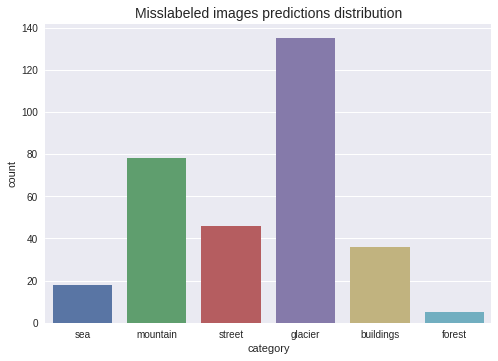

In [126]:
sns.countplot(x='category', data=test_df_with_pred[test_df_with_pred['category'] != test_df_with_pred['predictions']])
plt.title('Misslabeled images predictions distribution', fontsize=14)

*Glacier and mountain has the biggest number of wrong predictions*





## Showing random images, which were misslabeled

In [0]:
misslabeled_test_df = test_df_with_pred[test_df_with_pred['category'] != test_df_with_pred['predictions']]

In [0]:
misslabeled_test_df.reset_index(inplace=True)

In [0]:
def plot_predicted_images(df, path_col, pred_col, n_rows, n_columns, label_col=None,):
    f,ax = plt.subplots(n_rows,n_columns, figsize=(5 * n_columns, 5 * n_rows))
    for i in range(n_rows*n_columns):
        rand_int = np.random.randint(len(df.index))
        ax[i // n_columns, i % n_columns].imshow(np.array(Image.open(df[path_col][rand_int])))
        ax[i // n_columns, i % n_columns].set_title(f"label: {df[label_col][rand_int]}, pred: {df[pred_col][rand_int]}")
        ax[i // n_columns, i % n_columns].axis('off')

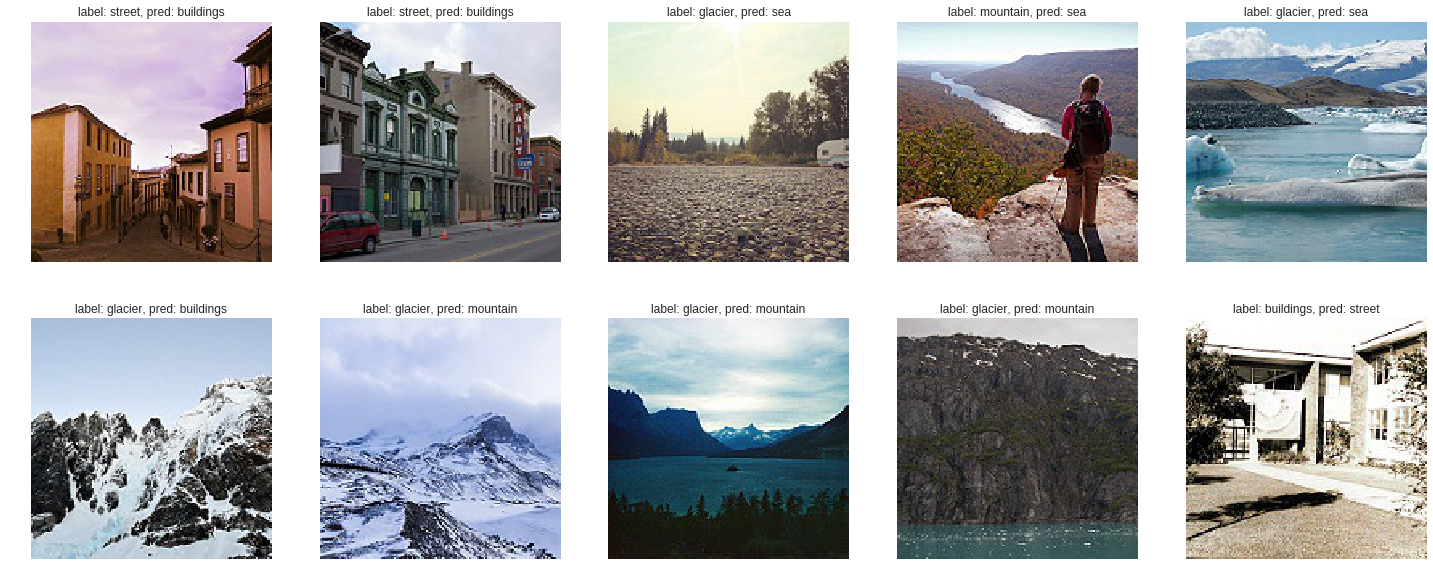

In [147]:
# label - correct label, pred - model prediction
plot_predicted_images(misslabeled_test_df, 'path', 'predictions', 2, 5, 'category')

## Predicting labels for unlabeled images using Final model

In [0]:
def make_df_from_dir_no_labels(path):
    data1 = {
        'image': [],
        'path':[],
        'shape': [], 
    }
    for item in os.listdir(DATA_DIR/path):
        data1['image'].append(f"{item}")
        data1['path'].append(DATA_DIR/path/item)            
        data1['shape'].append(np.array(Image.open(DATA_DIR/path/item)).shape)
            
        
    return pd.DataFrame(data1)

In [0]:
predict_no_labels_df = make_df_from_dir_no_labels('seg_pred/seg_pred')

In [0]:
predict_no_labels_df.to_csv(str(TEMP_DIR/'predict_no_labels_df.csv'), index=False)

In [0]:
predict_no_labels_df = pd.read_csv(str(TEMP_DIR/'predict_no_labels_df.csv'))

In [100]:
predict_no_labels_df.shape

(7301, 3)

In [0]:
# Dummy label
predict_no_labels_df['category'] = 'sea'

In [0]:
pred_dataset, pred_dataset_length, pred_batch_size = prepare_ds(
    x=np.array([str(DATA_DIR/"seg_pred/seg_pred"/f"{getattr(row, image_path_col)}") for row in predict_no_labels_df.itertuples()]),
    y=label_pipeline.transform(predict_no_labels_df[target_col]),
    batch_size=2,
    parse_fn=image_parse,
    augment_fn=augment,
    mode="crop",
    shuffle=False,
    prefetch=0,
    num_parallel_calls=-1,
)

In [0]:
pred_predictions = model_1.predict(
    pred_dataset,
    steps=math.ceil(pred_dataset_length/test_batch_size),
)

In [104]:
pred_predictions.argmax(axis=1)

array([2, 4, 5, ..., 0, 4, 5])

In [0]:
pred_pred_orig_labels = label_pipeline.inverse_transform(pred_predictions.argmax(axis=1))

In [106]:
pred_pred_orig_labels

array(['glacier', 'sea', 'street', ..., 'buildings', 'sea', 'street'],
      dtype=object)

In [0]:
predict_with_guessed_labels_df = predict_no_labels_df.copy()

In [0]:
predict_with_guessed_labels_df['prediction'] = pred_pred_orig_labels

In [0]:
predict_with_guessed_labels_df['category'] = '-'

In [110]:
predict_with_guessed_labels_df.head(3)

image  ... prediction
0  18695.jpg  ...    glacier
1   2920.jpg  ...        sea
2  11130.jpg  ...     street

[3 rows x 5 columns]

### Showing predicted labels for unlabeled images. Pred - prediction of Final model

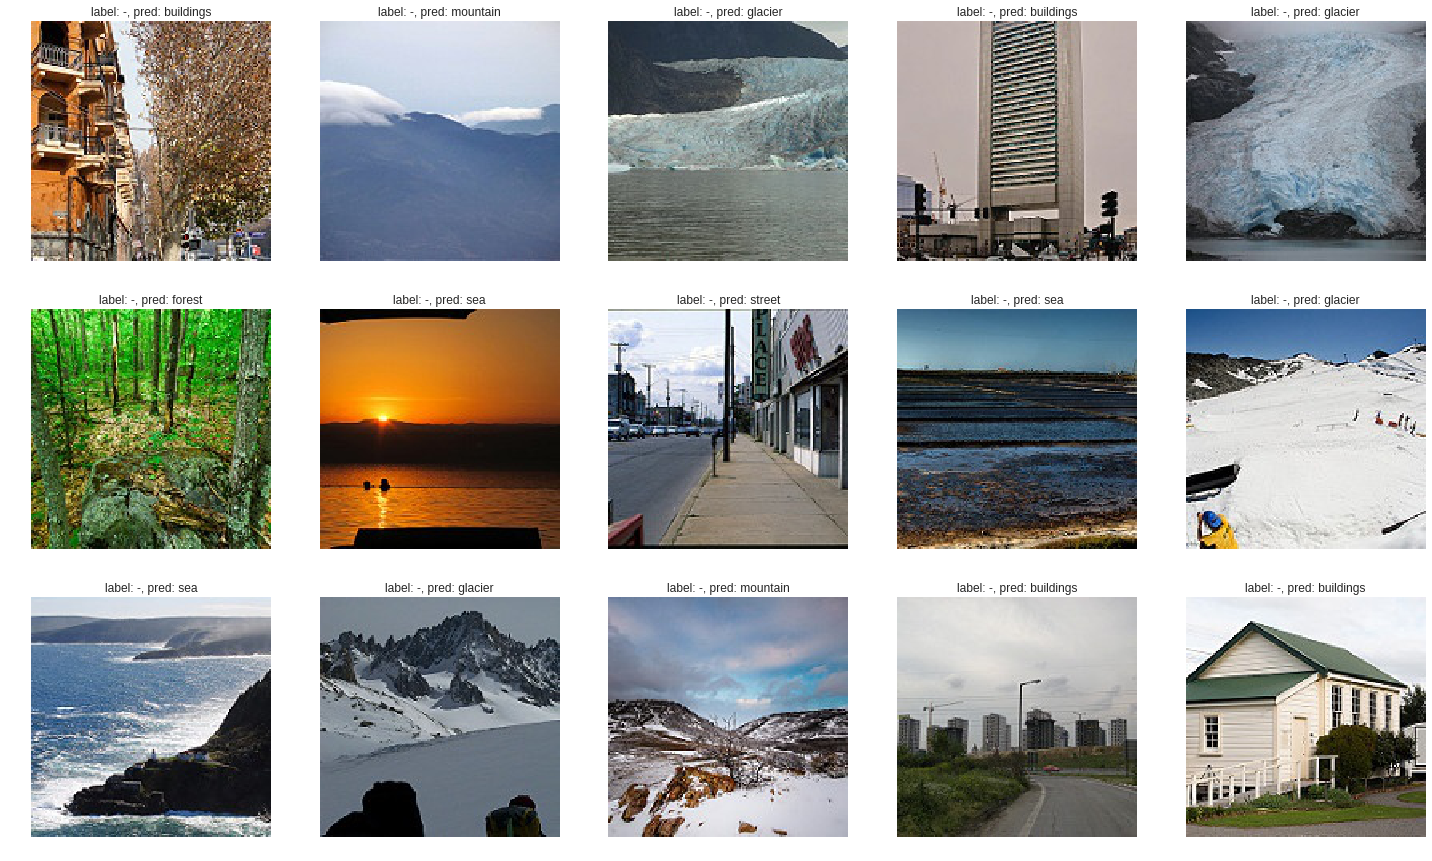

In [111]:
plot_predicted_images(predict_with_guessed_labels_df, 'path', 'prediction', 3, 5, 'category')

### Distribution of predicted labels for unlabeled images

In [112]:
predict_with_guessed_labels_df.groupby('prediction')['image'].nunique()

prediction
buildings    1207
forest       1201
glacier      1053
mountain     1384
sea          1253
street       1203
Name: image, dtype: int64

Text(0.5, 1.0, 'Unlabeled images predictions distribution')

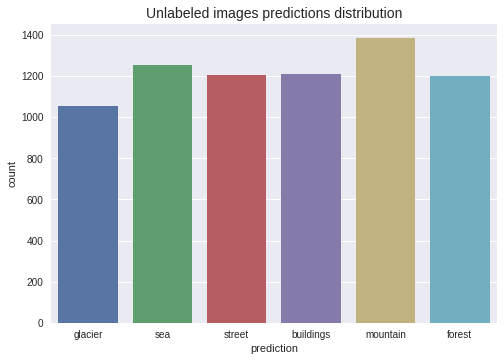

In [118]:
sns.countplot(predict_with_guessed_labels_df['prediction'], data=predict_with_guessed_labels_df)
plt.title('Unlabeled images predictions distribution', fontsize=14)